In [61]:
import os
import PIL.Image as Image
import cv2
import numpy as np
import pandas as pd
import pathlib

import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub

import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split

In [16]:
Image_sizes = (224, 224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=Image_sizes+(3,))
])

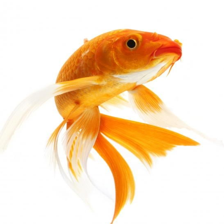

In [57]:
goldfish = Image.open('../Dataset/Goldfish.jpg').resize(Image_sizes)
goldfish

In [58]:
goldfish = np.array(goldfish)/255.0
print(goldfish.shape)
goldfish[np.newaxis,...].shape # model expects multiple image as input so we got to change it.

(224, 224, 3)


(1, 224, 224, 3)

In [59]:
result = classifier.predict(goldfish[np.newaxis,...])
result.shape

(1, 1001)

In [52]:
labels = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt', delimiter = "\t", names= ['name'])
labels.head()

,name
0,background
1,tench
2,goldfish
3,great white shark
4,tiger shark


In [60]:
labels['name'][np.argmax(result)]

'goldfish'

In [62]:
data_dir = pathlib.Path("E:/Dataset/flower_photos")
data_dir

WindowsPath('E:/Dataset/flower_photos')

In [63]:
flower_dict = {
'roses' : list(data_dir.glob('roses/*')),
'tulips' : list(data_dir.glob('tulips/*')),
'dandelion' : list(data_dir.glob('dandelion/*')),
'daisy' : list(data_dir.glob('daisy/*')),
'sunflowers' : list(data_dir.glob('sunflowers/*')),
}
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

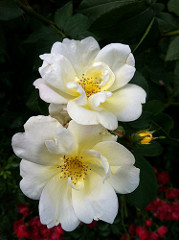

In [66]:
Image.open(flower_dict['roses'][0])

In [64]:
img = cv2.imread(str(flower_dict['roses'][0]))
img.shape

(240, 179, 3)

In [92]:
X, y = [], []

#Resize the image

for flower_name, images in flower_dict.items():
    print(flower_name, ":", len(images))
    for image in images:
        img = cv2.imread(str(image))
        resize_image = cv2.resize(img, (224, 224))
        X.append(resize_image)
        y.append(flowers_labels_dict[flower_name])

roses : 641
tulips : 799
dandelion : 898
daisy : 633
sunflowers : 699


In [93]:
X = np.array(X)
y = np.array(y)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([0, 1, 2, 3, 4]), array([465, 491, 683, 515, 598], dtype=int64)),
 (array([0, 1, 2, 3, 4]), array([176, 142, 215, 184, 201], dtype=int64)))

In [95]:
X_train_scl = X_train / 255
X_test_scl = X_test / 255
len(X_train_scl), len(y_train)

(2752, 2752)

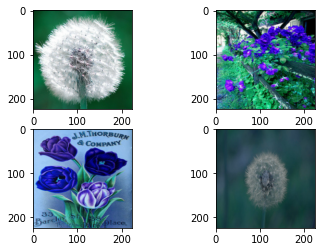

In [96]:
plt.subplot(2,2,1)
plt.imshow(X_train[0]);
plt.subplot(2,2,2)
plt.imshow(X_train[1]);
plt.subplot(2,2,3)
plt.imshow(X_train[2]);
plt.subplot(2,2,4)
plt.imshow(X_train[3]);

In [97]:
IMAGE_SHAPE = (224,224)

In [98]:
result = classifier.predict(np.array([
cv2.resize(X[0], IMAGE_SHAPE),
cv2.resize(X[1], IMAGE_SHAPE),
cv2.resize(X[2], IMAGE_SHAPE)]))
result.shape

(3, 1001)

In [104]:
np.argmax(result, axis=1)

array([795, 880, 795], dtype=int64)

In [115]:
result = classifier.predict(np.array([X_train[0], X_train[1], X_train[2], X_train[3]]))

In [116]:
np.argmax(result, axis=1)

array([795, 550, 722, 795], dtype=int64)

In [117]:
labels['name'][795], labels['name'][550], labels['name'][722]

('shower curtain', 'envelope', 'pillow')

# Another Method

In [120]:
Image_sizes = (224, 224)
pretrained_layer = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", input_shape=Image_sizes+(3,), trainable = False)
])

In [127]:
model = tf.keras.Sequential([
  pretrained_layer,
  tf.keras.layers.Dense(len(flowers_labels_dict))
])

model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy']
)

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 1280)              2257984   
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [129]:
model.fit(X_train_scl, y_train, epochs = 10)

Epoch 1/10
86/86 [==============================] - 29s 203ms/step - loss: 0.7702 - accuracy: 0.7169
Epoch 2/10
86/86 [==============================] - 17s 193ms/step - loss: 0.4036 - accuracy: 0.8623 - ETA: 3s - loss: 0.415 - ETA: 1s - loss: 0.409
Epoch 3/10
86/86 [==============================] - 16s 192ms/step - loss: 0.3122 - accuracy: 0.9004 12s - l
Epoch 4/10
86/86 [==============================] - 16s 192ms/step - loss: 0.2608 - accuracy: 0.9222
Epoch 5/10
86/86 [==============================] - 16s 191ms/step - loss: 0.2258 - accuracy: 0.9324
Epoch 6/10
86/86 [==============================] - 16s 190ms/step - loss: 0.2015 - accuracy: 0.9430
Epoch 7/10
86/86 [==============================] - 16s 191ms/step - loss: 0.1764 - accuracy: 0.9553
Epoch 8/10
86/86 [==============================] - 17s 193ms/step - loss: 0.1561 - accuracy: 0.9593
Epoch 9/10
86/86 [==============================] - 17s 193ms/step - loss: 0.1409 - accuracy: 0.9662
Epoch 10/10
86/86 [================

In [130]:
model.evaluate(X_test_scl, y_test)

29/29 [==============================] - 6s 195ms/step - loss: 0.3760 - accuracy: 0.8671


[0.3759617507457733, 0.8671023845672607]